# __Пивоварчук Андрей. Гилев Никита. Курсовая работа__

### 1. Скачать данные о рынке недвижимости c открытого соревнования Сбербанка по машинному обучению https://www.kaggle.com/c/sberbank-russian-housing-market/data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,10)
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae, r2_score,  mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

In [2]:
#Скачиваем, записываем и просматриваем данные файлы.
train = pd.read_csv('train.csv')
display(train)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [3]:
macro = pd.read_csv('macro.csv')
display(macro)
macro['timestamp'].describe()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count           2484
unique          2484
top       2010-01-01
freq               1
Name: timestamp, dtype: object

In [4]:
#Объединяем датафреймы.
macro['timestamp'] = pd.to_datetime(macro['timestamp'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
df = pd.merge(train, macro, on = 'timestamp')
display(df)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


### 2. Провести чистку данных (пропуски данных, неинформативные признаки, аномалии, оцифровка текстовых столбцов и т.п.).

In [5]:
#Поиск категориальных признаков
i=0
for column in df.select_dtypes(include='object'):
    i=i+1
    print(i)
    print(column)
    print('Uniq values:', df[column].nunique())
    print(df[column].unique())

1
product_type
Uniq values: 2
['Investment' 'OwnerOccupier']
2
sub_area
Uniq values: 146
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Nikulino' 'Severnoe 

In [6]:
# Присваивание категориальным столбцам числовые значения.
pt = {'Investment': 1, 'OwnerOccupier': 0}
df['product_type'] = df['product_type'].map(pt)

ec = {'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4, 'no data': np.nan}
df['ecology'] = df['ecology'].map(ec)

df['child_on_acc_pre_school']  = df['child_on_acc_pre_school'].replace('#!', np.nan)

cmo = ['child_on_acc_pre_school', 'modern_education_share', 'old_education_build_share']

for column in cmo:
  df[column] = df[column].str.replace(',', '.').astype(float)

bin_cols = ['culture_objects_top_25', 
            'thermal_power_plant_raion', 
            'incineration_raion', 
            'oil_chemistry_raion', 
            'radiation_raion', 
            'railroad_terminal_raion', 
            'big_market_raion', 
            'nuclear_reactor_raion', 
            'detention_facility_raion', 
            'water_1line', 
            'big_road1_1line', 
            'railroad_1line']
df[bin_cols] = df[bin_cols].applymap(lambda x: 1 if x == 'yes' else 0)

In [7]:
suba = (df['sub_area'].value_counts() >= 100).loc[lambda x: x==True].index.tolist()

df['sub_area_new'] = np.where(df['sub_area'].isin(suba), df['sub_area'], 'Other')
df['sub_area_new'].value_counts()

print('До объединения -\n', df['sub_area'].value_counts())
print('\nПосле объединения -\n', df['sub_area_new'].value_counts())

df = df.drop('sub_area', axis=1)

До объединения -
 Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

После объединения -
 Other                   1851
Poselenie Sosenskoe     1776
Nekrasovka              1611
Poselenie Vnukovskoe    1372
Poselenie Moskovskij     925
                        ... 
Krylatskoe               103
Butyrskoe                101
Alekseevskoe             100
Prospekt Vernadskogo     100
Silino                   100
Name: sub_area_new, Length: 109, dtype: int64


In [8]:
#Поиск аномалий
print(df['state'].value_counts())
df['state'].replace(33,3, inplace=True)

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64


In [9]:
print(df['state'].value_counts())

2.0    5844
3.0    5791
1.0    4855
4.0     422
Name: state, dtype: int64


In [10]:
print(df['build_year'].value_counts())

2014.0    919
2015.0    824
0.0       530
2013.0    464
1970.0    418
         ... 
1948.0      1
1895.0      1
1925.0      1
4965.0      1
71.0        1
Name: build_year, Length: 119, dtype: int64


In [11]:
bld_yr_replace = {20052009:2009, 0:np.nan, 1:np.nan, 2:np.nan, 3:np.nan, 20:2020, 215:2015, 4965:1965, 71:1971}
df['build_year'].replace(bld_yr_replace, inplace = True)
print(df['build_year'].value_counts())

2014.0    919
2015.0    825
2013.0    464
1970.0    418
1969.0    407
         ... 
1906.0      1
1691.0      1
1905.0      1
1886.0      1
2018.0      1
Name: build_year, Length: 112, dtype: int64


In [12]:
df['max_floor'].unique()

array([ nan,  17.,   5.,  22.,  16.,   9.,   8.,   0.,  24.,   1.,   6.,
        10.,  25.,  14.,  12.,  18.,  23.,  20.,   7.,   4.,  30.,  11.,
         3.,  40.,   2.,  32.,  15.,  27.,  21.,  19.,  28.,  29.,  13.,
        39.,  38.,  31.,  26.,  37.,  33.,  47.,  36.,  34.,  48.,  42.,
        45.,  99.,  57.,  44., 117.,  41.])

In [13]:
max_flr_replace = {117:17, 99:np.nan, 0:np.nan}
df['max_floor'].replace(max_flr_replace, inplace = True)
df['max_floor'].unique()

array([nan, 17.,  5., 22., 16.,  9.,  8., 24.,  1.,  6., 10., 25., 14.,
       12., 18., 23., 20.,  7.,  4., 30., 11.,  3., 40.,  2., 32., 15.,
       27., 21., 19., 28., 29., 13., 39., 38., 31., 26., 37., 33., 47.,
       36., 34., 48., 42., 45., 57., 44., 41.])

In [14]:
full_sq_replace = {5326:np.nan, 0:np.nan,}
df['full_sq'].replace(full_sq_replace, inplace = True)
df['full_sq'].unique()

array([ 43.,  34.,  89.,  77.,  67.,  25.,  44.,  42.,  36.,  38.,  31.,
        51.,  47.,  59.,  74.,  39.,  48.,  32.,  45.,  35.,  73.,  40.,
        81.,  37.,  27.,  33.,  54.,  46.,  56.,  75.,  64.,  96.,  52.,
        63.,  50.,  76.,  66.,  30.,  53., 133.,  72.,  41.,  26.,  58.,
        78.,  57.,  61., 325.,  55.,  22.,  62., 102., 117.,  60.,  86.,
        85., 115.,  98.,  80.,  68.,  49., 104.,  84.,  17.,  93.,  99.,
       144.,  83.,  20., 154.,  79.,  71.,  28.,  70.,  23.,  90., 100.,
       129., 130.,  95., 111., 131., 108.,  82., 126., 112., 110.,  92.,
        29., 125., 106.,  87.,  12.,  97., 167., 114., 118., 136., 166.,
       120., 123.,  65., 183., 155., 101., 204.,  88.,  94., 107.,  13.,
       147.,  69., 169., 127.,   9.,  19., 103., 291.,  15., 353., 187.,
       142., 137., 394., 113., 148.,  18.,   5., 134., 173., 412., 105.,
       178., 119., 138., 729., 156., 139., 164.,  21., 172.,  nan, 208.,
       150., 157., 388., 159., 158.,  10., 170., 16

In [15]:
#Удаление неинформативных признаков.
df = df.drop(['id', 
              'ID_big_road1', 
              'ID_big_road2', 
              'ID_bus_terminal', 
              'ID_metro', 
              'ID_railroad_station_avto', 
              'ID_railroad_station_walk', 
              'ID_railroad_terminal'], axis=1)

In [16]:
#Поиск пропусков цены и дупликатов, удаление.
print('Количество пропусков цены -', df['price_doc'].isna().sum())
print('Количество дупликатов -',df.duplicated().sum())
df = df.drop_duplicates()
print('Теперь дупликатов -', df.duplicated().sum())

Количество пропусков цены - 0
Количество дупликатов - 10
Теперь дупликатов - 0


In [17]:
#Удаляем признаки, которые заполнены менее чем на 55 процентов (уровень пропусков выше 45%).
i=0
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing*100 > 45:
        df.drop([str(col)], axis = 1, inplace=True)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    i=i+1
    print(i)

timestamp - 0%
1
full_sq - 0%
2
life_sq - 21%
3
floor - 1%
4
max_floor - 33%
5
material - 31%
6
num_room - 31%
7
kitch_sq - 31%
8
state - 44%
9
product_type - 0%
10
area_m - 0%
11
raion_popul - 0%
12
green_zone_part - 0%
13
indust_part - 0%
14
children_preschool - 0%
15
preschool_quota - 22%
16
preschool_education_centers_raion - 0%
17
children_school - 0%
18
school_quota - 22%
19
school_education_centers_raion - 0%
20
school_education_centers_top_20_raion - 0%
21
healthcare_centers_raion - 0%
22
university_top_20_raion - 0%
23
sport_objects_raion - 0%
24
additional_education_raion - 0%
25
culture_objects_top_25 - 0%
26
culture_objects_top_25_raion - 0%
27
shopping_centers_raion - 0%
28
office_raion - 0%
29
thermal_power_plant_raion - 0%
30
incineration_raion - 0%
31
oil_chemistry_raion - 0%
32
radiation_raion - 0%
33
railroad_terminal_raion - 0%
34
big_market_raion - 0%
35
nuclear_reactor_raion - 0%
36
detention_facility_raion - 0%
37
full_all - 0%
38
male_f - 0%
39
female_f - 0%
40
y

In [18]:
#Создаем индикатор для строчек с пропущенными данными.
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
display(df)

created missing indicator for: full_sq
created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raion_build_count_with_builddate_info
created missing indi

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,...,child_on_acc_pre_school_ismissing,modern_education_share_ismissing,old_education_build_share_ismissing,provision_doctors_ismissing,power_clinics_ismissing,hospital_beds_available_per_cap_ismissing,hospital_bed_occupancy_per_year_ismissing,population_reg_sports_share_ismissing,apartment_build_ismissing,num_missing
0,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,11
1,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
2,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
3,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
4,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,2.0,6.0,3.0,1,...,True,False,False,True,True,True,True,True,True,34
30467,2015-06-30,86.0,59.0,3.0,9.0,2.0,4.0,10.0,3.0,1,...,True,False,False,True,True,True,True,True,True,34
30468,2015-06-30,45.0,NaN,10.0,20.0,1.0,1.0,1.0,1.0,0,...,True,False,False,True,True,True,True,True,True,54
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2.0,11.0,2.0,1,...,True,False,False,True,True,True,True,True,True,34


In [19]:
# Удаляем строки с большим количеством пропусков(больше 35).
ind_missing = df[df['num_missing'] > 35].index
df.drop(ind_missing, axis=0, inplace=True)
display(df)

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,...,child_on_acc_pre_school_ismissing,modern_education_share_ismissing,old_education_build_share_ismissing,provision_doctors_ismissing,power_clinics_ismissing,hospital_beds_available_per_cap_ismissing,hospital_bed_occupancy_per_year_ismissing,population_reg_sports_share_ismissing,apartment_build_ismissing,num_missing
0,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,11
1,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
2,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
3,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
4,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,1,...,True,True,True,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,2015-06-30,52.0,NaN,13.0,17.0,1.0,2.0,1.0,1.0,0,...,True,False,False,True,True,True,True,True,True,35
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,2.0,6.0,3.0,1,...,True,False,False,True,True,True,True,True,True,34
30467,2015-06-30,86.0,59.0,3.0,9.0,2.0,4.0,10.0,3.0,1,...,True,False,False,True,True,True,True,True,True,34
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2.0,11.0,2.0,1,...,True,False,False,True,True,True,True,True,True,34


### 3. Провести Exploratory Data Analysis. Проанализировать переменные, влияющие на зависимую переменную - стоимость недвижимости price_doc.

In [20]:
#C помощью алгоритма на основе деревьев решений ищем самые важные признаки.
df_new = df.select_dtypes(include=[np.number])
df_new = df_new.dropna()
df_new['price_doc_right'] = df_new['price_doc']
df_new.drop('price_doc', axis=1, inplace=True)
array = df_new.values
X = array[:,0:373]
Y = array[:,373]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[1.31986521e-02 1.15954760e-02 1.10841198e-02 7.66370201e-03
 5.52103367e-03 9.65047395e-03 7.91910969e-03 6.93261783e-03
 8.17275609e-04 1.34894124e-03 1.37942903e-03 1.40805987e-03
 1.43156588e-03 1.39947152e-03 1.42702699e-03 1.34531842e-03
 1.39418685e-03 1.36897195e-03 1.37897261e-03 5.50954812e-04
 1.36274886e-03 4.66371800e-04 1.43526824e-03 1.28958414e-03
 2.64027386e-04 2.55610352e-04 1.39160084e-03 1.33851237e-03
 3.30914943e-04 1.26549868e-04 8.86138069e-05 1.05808158e-03
 1.90855996e-04 2.02390639e-04 3.03226643e-04 4.33139481e-04
 1.35281129e-03 1.31285367e-03 1.35195223e-03 1.35541858e-03
 1.30332768e-03 1.27910196e-03 1.45652232e-03 1.45028535e-03
 1.33655790e-03 1.41013081e-03 1.34611451e-03 1.36027701e-03
 1.29459896e-03 1.31815594e-03 1.42281141e-03 1.28328403e-03
 1.33207264e-03 1.31644639e-03 1.32406200e-03 1.30577042e-03
 1.32211380e-03 1.35177464e-03 1.38082373e-03 1.32278040e-03
 1.36861894e-03 1.29755355e-03 1.28215071e-03 1.40488071e-03
 1.42629438e-03 1.006580

In [21]:
#10 самых влияющих на цену недвижимости признаков.
tree_df = pd.DataFrame(data = model.feature_importances_, index=[list(range(1,374))])
tree_df.sort_values(0, ascending=False).head(10)

,0
1,0.013199
2,0.011595
3,0.011084
299,0.010213
297,0.010078
290,0.010068
296,0.010056
289,0.009795
298,0.009750
6,0.009650


Как мы выяснили, 10 признаков, имеющих самую высокую 
коррелляцию с ценой на недвижимость под индексами:

    1 - full_sq,

    2 - life_sq,

    3 - floor,

    299 - micex_cbi_tr,

    297 - micex,

    296 - rtc,

    289 - eurrub,

    288 - usdrub,

    290 - brent,

    6 - num_room

Так как признаки: 

    1,2,6. 
                  
    299,297,296.
                  
    289,288.
обладают коррелляцией между собой, можно сделать вывод
о том, что цена недвижимости больше всего зависит от 
жилплощади, этажности, общего тренда рынка ценных бумаг,
стоимости валюты, нефти.

<AxesSubplot:xlabel='full_sq'>

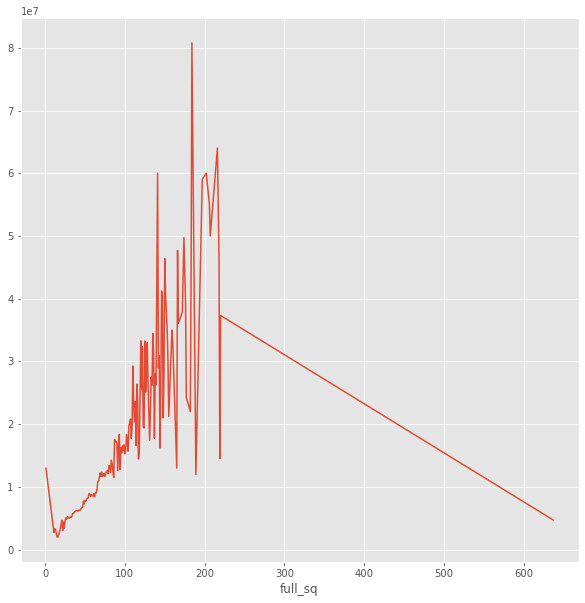

In [22]:
#Корелляция цены на недвижимость в зависимости от жилплощади.
agg = df_new.groupby('full_sq')['price_doc_right'].mean()
agg.plot()

<AxesSubplot:xlabel='timestamp'>

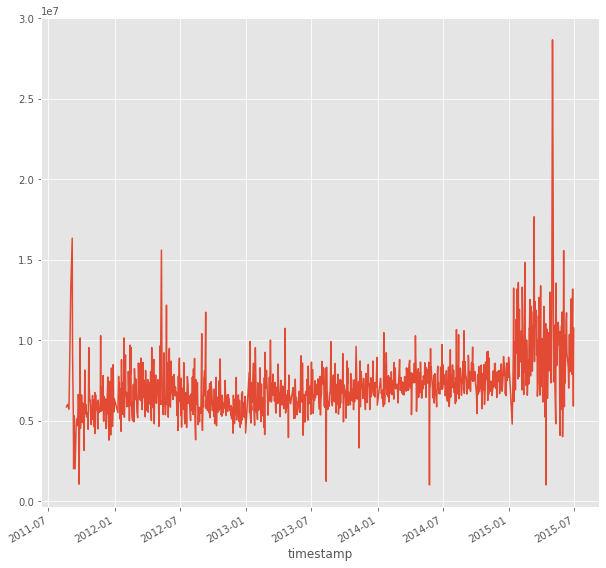

In [23]:
#Корелляция цены на недвижимость в зависимости от даты.
agg2 = df.groupby('timestamp')['price_doc'].mean()
agg2.plot()

<AxesSubplot:>

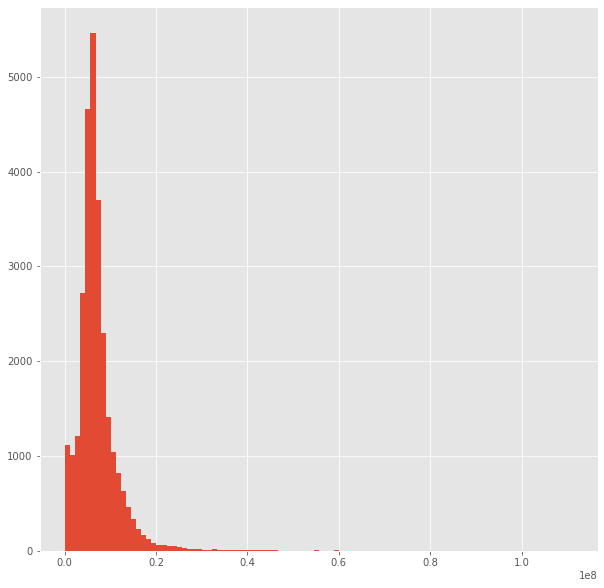

In [24]:
# Какая цена на недвижимость встречается чаще.
df['price_doc'].hist(bins=100)

### 4. Разделить датасет на обучающие и тестовую выборки.

In [25]:
#Разделение датасета на обучающую и тестовую выборку с помощью train_test_split. 
X_new = df.copy()
X_new = X_new[X_new.select_dtypes(include = 'number').columns]
X_new = X_new.dropna()
Y_new = np.array(X_new['price_doc'])
X_new = X_new.drop('price_doc', axis=1)

X_train0, X_test0, Y_train0, Y_test0 = tts(X_new, Y_new, test_size=0.2, shuffle=True)

### 5. Обучить регрессионную модель предсказывать стоимость недвижимости в зависимости от разных факторов и выявить показатели качества модели на обучающей и тестовой выборке.


In [26]:
#Обучение регрессионной модели с помощью GradientBoostingRegressor.
regress = GradientBoostingRegressor()
regress.fit(X_train0, Y_train0)

Y_train_pred0 = regress.predict(X_train0)
Y_test_pred0 = regress.predict(X_test0)

In [27]:
#Вывод метрик качества модели.
print('Train MAE', mae(Y_train0, Y_train_pred0),' ', 'Test MAE:', mae(Y_test0, Y_test_pred0))
print('Train MSE', mse(Y_train0, Y_train_pred0),' ', 'Test MSE:', mse(Y_test0, Y_test_pred0))
print('Train R2', r2_score(Y_train0, Y_train_pred0),' ', 'Test R2:', r2_score(Y_test0, Y_test_pred0))

Train MAE 1673430.3328713826   Test MAE: 2119451.0129430066
Train MSE 6493129137005.893   Test MSE: 13989380388625.686
Train R2 0.7745848061089692   Test R2: 0.6592563203000172


### 6. Реализовать методы feature engineering с целью повышения метрик качества модели. 

In [28]:
# Cоздаем новые фичи по признаку timestamp.
df['month'] = (df['timestamp'].dt.to_period('M'))
df['dow'] = df['timestamp'].dt.dayofweek
df['dom'] = df['timestamp'].dt.day
df['doy'] = df['timestamp'].dt.dayofyear
df['month'] = df['timestamp'].dt.month
df = df.drop('timestamp', axis=1)

In [29]:
#Разделение датасета на обучающую и тестовую выборку с помощью train_test_split.
X = df.copy()
Y = X.pop('price_doc')
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, stratify=X['sub_area_new'], shuffle=True)

In [30]:
#Объявление и подготовка к реализации новых фич.
features1 = ['sub_area_new']
features2 = ['thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 
             'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
             'water_1line', 'big_road1_1line', 'railroad_1line', 'railroad_1line', 'product_type', 'ecology', 
             'material', 'state', 'month', 'dow', 'dom', 'doy', 'month']

features = features1 + features2

list_features =list(set(X_train.columns.tolist()) - set(features))

In [31]:
#Преобразование исходных данных при загрузке в модель.
categorial_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

imputer_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

scale_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('cut1', categorial_transformer, features1),
                                               ('cut2', imputer_transformer, features2),
                                               ('scale', scale_transformer, list_features)
                                               ],remainder = 'passthrough' )

reg = Pipeline(steps= [('preprocessor', preprocessor),
                       ('regressor', GradientBoostingRegressor())])

In [32]:
#Обучение новой регрессионной модели.
reg.fit(X_train, Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

In [33]:
#Вывод метрик качества новой модели.
print('Train MAE', mae(Y_train, Y_train_pred),' ', 'Test MAE:', mae(Y_test, Y_test_pred))
print('Train MSE', mse(Y_train, Y_train_pred),' ', 'Test MSE:', mse(Y_test, Y_test_pred))
print('Train R2', r2_score(Y_train, Y_train_pred),' ', 'Test R2:', r2_score(Y_test, Y_test_pred))

Train MAE 1467821.4526040475   Test MAE: 1566538.6378123416
Train MSE 6030465598611.409   Test MSE: 8159207689625.321
Train R2 0.7399847481868393   Test R2: 0.6809056157047925


### Вывод:
#### Новая регрессионная модель, обученная с дополнительными признаками, показывает результаты лучше чем первая. Такой вывод можно сделать исходя из метрик оценки качества модели: cредний модуль отклонения (MAE),  cредний квадрат отклонения (MSE) и Коэффициент детерминации (R^2). Следовательно выполненный feature engineering показал свою эффективность.